Creamos el arbol

# Train:Dani,Ivan,Alex  Val:Vero

In [13]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X_train= genfromtxt("X_train.csv", delimiter=',')
y_train= genfromtxt("y_train.csv", delimiter='')
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_val= genfromtxt("X_val.csv", delimiter=',')
y_val= genfromtxt("y_val.csv", delimiter='')
X_val[np.isnan(X_val)] = np.median(X_val[~np.isnan(X_val)])

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0,min_samples_split=0.009,min_samples_leaf=0.009)
clf = clf.fit(X_train, y_train)


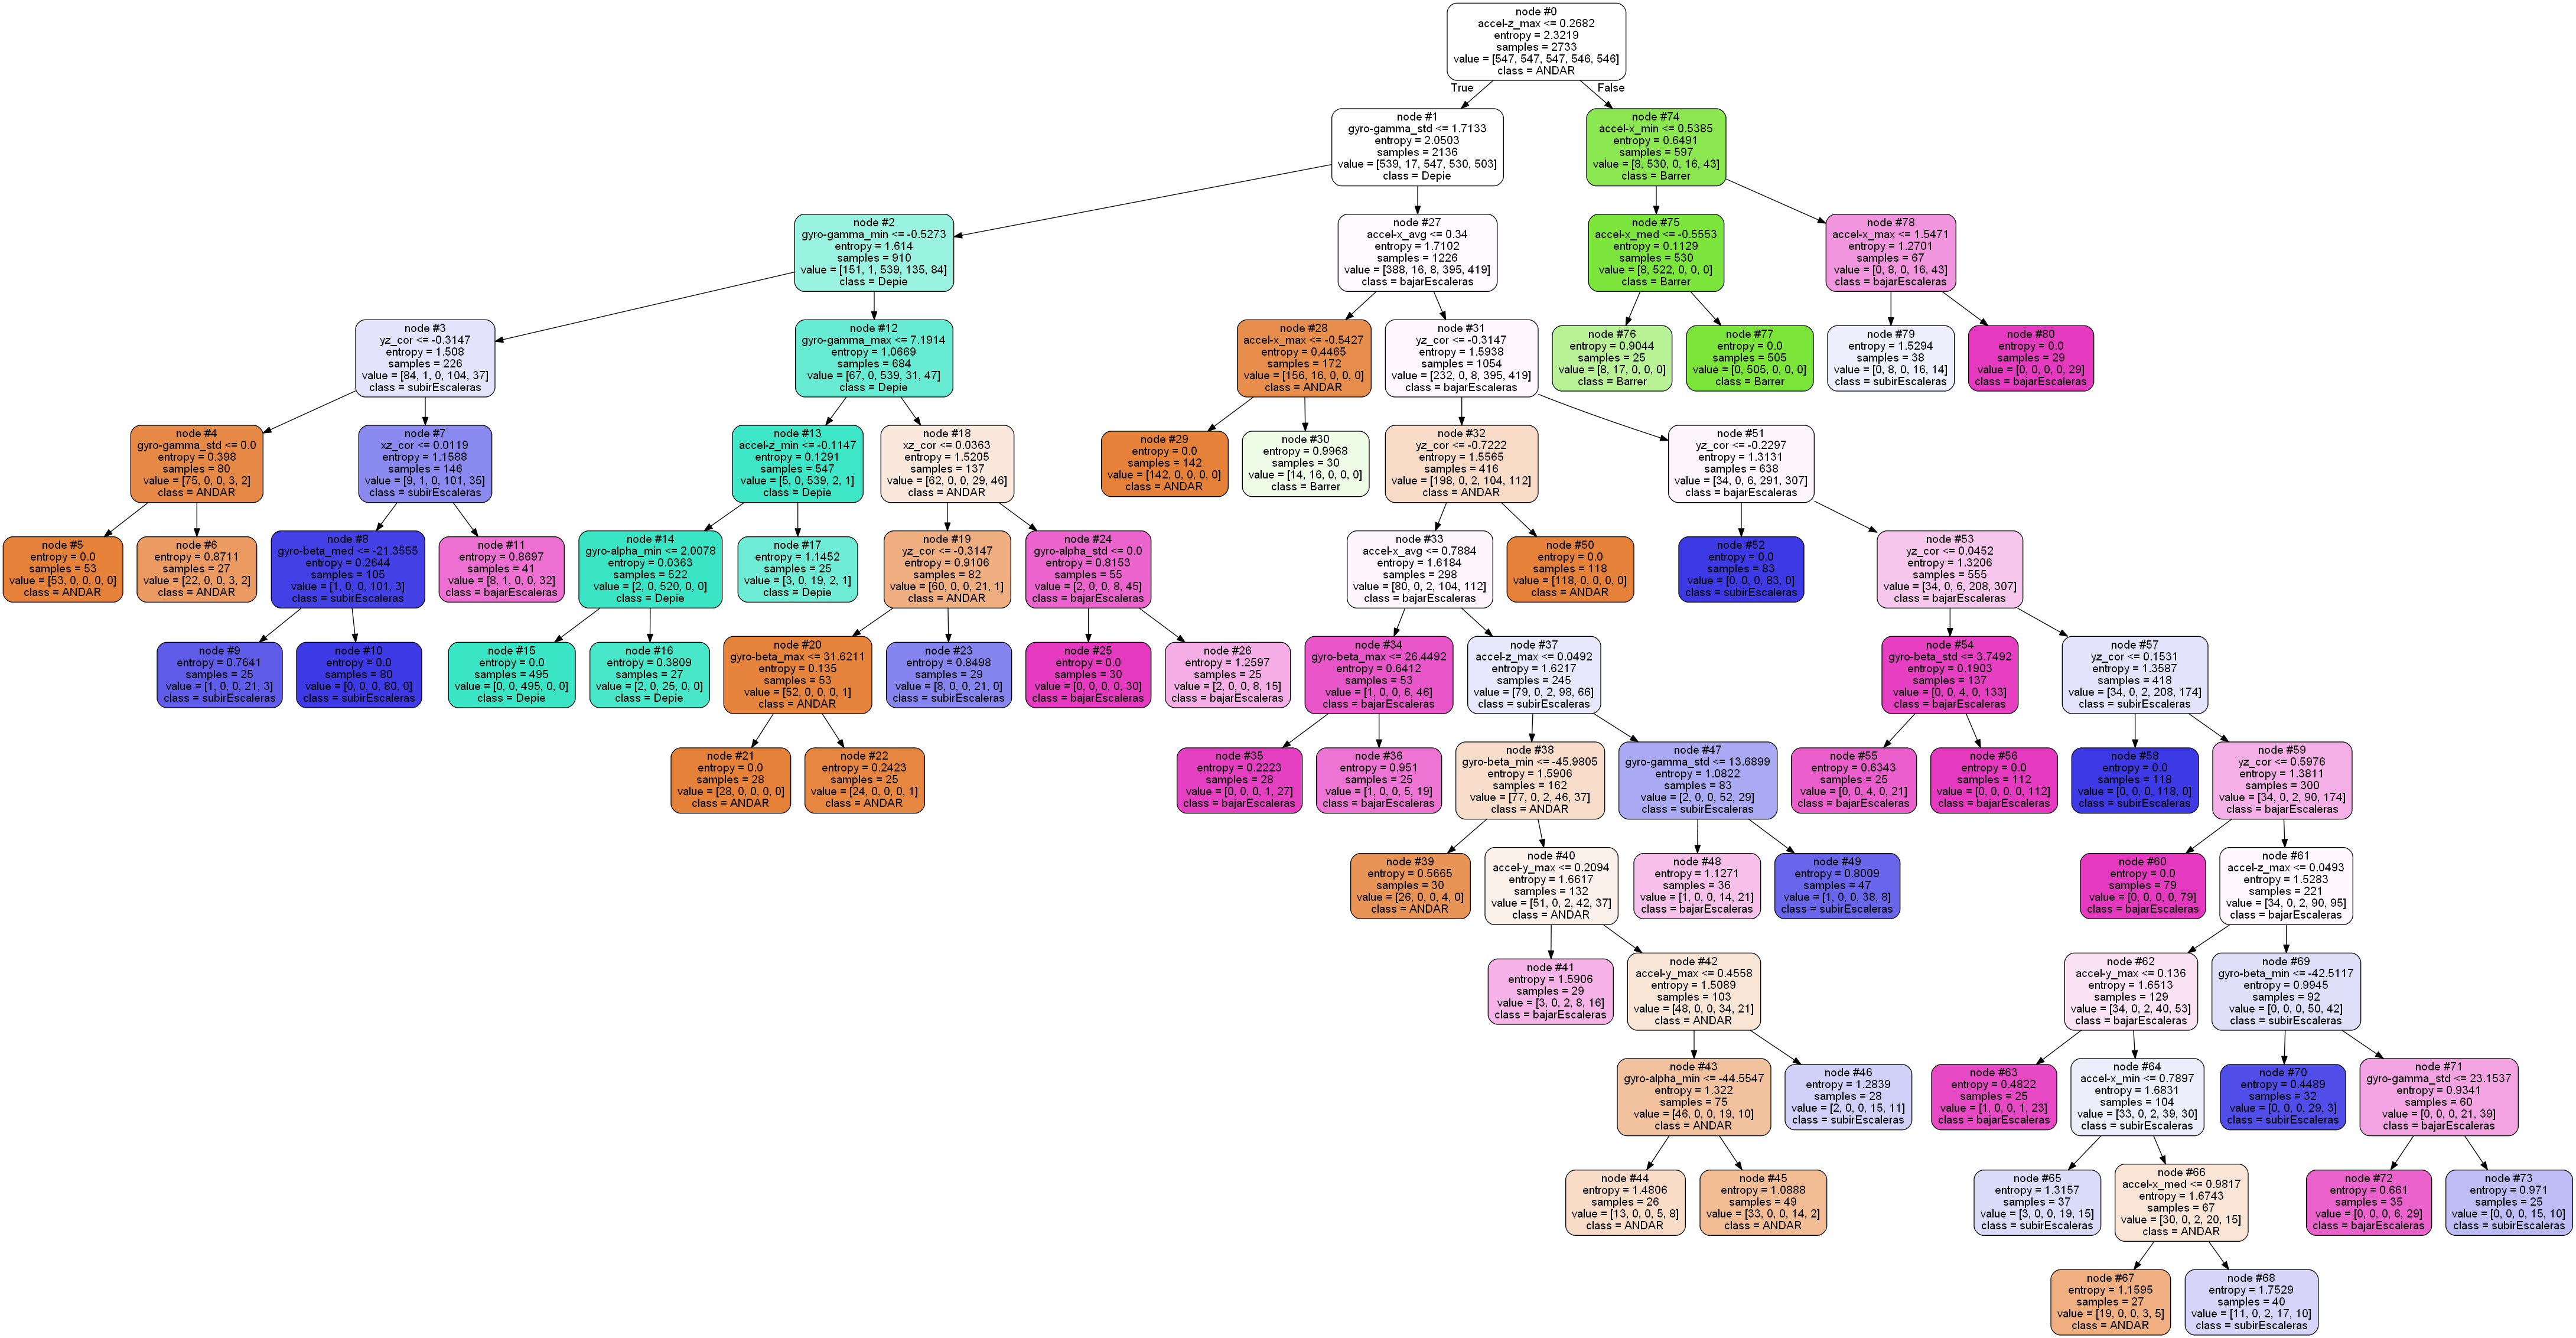

In [79]:
#Pintar aquí
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        clf, 
        out_file=None,
        
        feature_names=[ 'gyro-alpha_avg','gyro-beta_avg','gyro-gamma_avg','accel-x_avg','accel-y_avg','accel-z_avg','gyro-alpha_min','gyro-beta_min','gyro-gamma_min','accel-x_min','accel-y_min','accel-z_min','gyro-alpha_max','gyro-beta_max','gyro-gamma_max','accel-x_max','accel-y_max','accel-z_max','gyro-alpha_std','gyro-beta_std','gyro-gamma_std','accel-x_std','accel-y_std','accel-z_std','xy_cor','xz_cor','yz_cor','x_fft','y_fft','z_fft','gyro-alpha_med','gyro-beta_med','gyro-gamma_med','accel-x_med','accel-y_med','accel-z_med'],
        class_names=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],  
        filled=True,
        rounded=True,
        node_ids=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

In [15]:
clf.score(X_val ,y_val)  

0.31434830230010952

Calculamos el porcentaje de aciertos

Calculamos la y predicha  y las metricas(precision,accuracy y recall)

In [16]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf, X_val, y_val)
y_predict=clf.predict(X_val)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_predict)

0.31434830230010952

In [18]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y_val, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.25      0.02      0.03       183
        Barrer       0.97      0.31      0.47       182
         Depie       0.85      0.53      0.66       182
subirEscaleras       0.23      0.60      0.33       183
bajarEscaleras       0.09      0.11      0.10       183

   avg / total       0.47      0.31      0.32       913



# Funciones para imprimir con plot

In [20]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

In [21]:
import matplotlib.pyplot as plt
plot_classification_report(sampleClassificationReport)

[0.25, 0.02, 0.03]
[0.97, 0.31, 0.47]
[0.85, 0.53, 0.66]
[0.23, 0.6, 0.33]
[0.09, 0.11, 0.1]
plotMat: [[0.25, 0.02, 0.03], [0.97, 0.31, 0.47], [0.85, 0.53, 0.66], [0.23, 0.6, 0.33], [0.09, 0.11, 0.1]]
support: [183, 182, 182, 183, 183]


In [22]:
 plt.savefig('test_plot_classif_report1.png', dpi=200, format='png', bbox_inches='tight')

C:\Users\veronica\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


# Matriz de confusion

In [23]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_predict)

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [25]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'], normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[  3   2   3  89  86]
 [  0  57   0 122   3]
 [  1   0  97   8  76]
 [  4   0  11 109  59]
 [  4   0   3 155  21]]
Normalized confusion matrix
[[ 0.01639344  0.01092896  0.01639344  0.4863388   0.46994536]
 [ 0.          0.31318681  0.          0.67032967  0.01648352]
 [ 0.00549451  0.          0.53296703  0.04395604  0.41758242]
 [ 0.02185792  0.          0.06010929  0.59562842  0.32240437]
 [ 0.02185792  0.          0.01639344  0.84699454  0.1147541 ]]


Reducimos el numero de caracteristicas y nos quedamos con las que mejor se ajusten al arbol

In [26]:
plt.show()

# Metricas mas importantes

In [18]:
clf.feature_importances_

array([ 0.00233591,  0.00412732,  0.00124689,  0.01487553,  0.00540982,
        0.0061059 ,  0.00246828,  0.00095163,  0.06989278,  0.04189891,
        0.00503896,  0.00034543,  0.0008385 ,  0.        ,  0.07959837,
        0.07719487,  0.00468215,  0.28918542,  0.00129707,  0.0042344 ,
        0.14424681,  0.        ,  0.        ,  0.        ,  0.00450409,
        0.04016688,  0.18118073,  0.        ,  0.        ,  0.00210437,
        0.00625115,  0.00119116,  0.        ,  0.00862667,  0.        ,  0.        ])

In [86]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape
print(model.get_support())


[False False False  True False False False False  True  True False False
 False False  True False False  True False False  True False False False
 False  True  True False False False False False False False False False]


# Train:Vero,Dani,Ivan Val:Alex

In [27]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X_train= genfromtxt("X_train2.csv", delimiter=',')
y_train= genfromtxt("y_train2.csv", delimiter='')
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_val= genfromtxt("X_val2.csv", delimiter=',')
y_val= genfromtxt("y_val2.csv", delimiter='')
X_val[np.isnan(X_val)] = np.median(X_val[~np.isnan(X_val)])

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0,min_samples_split=0.025,min_samples_leaf=0.025)
clf = clf.fit(X_train, y_train)

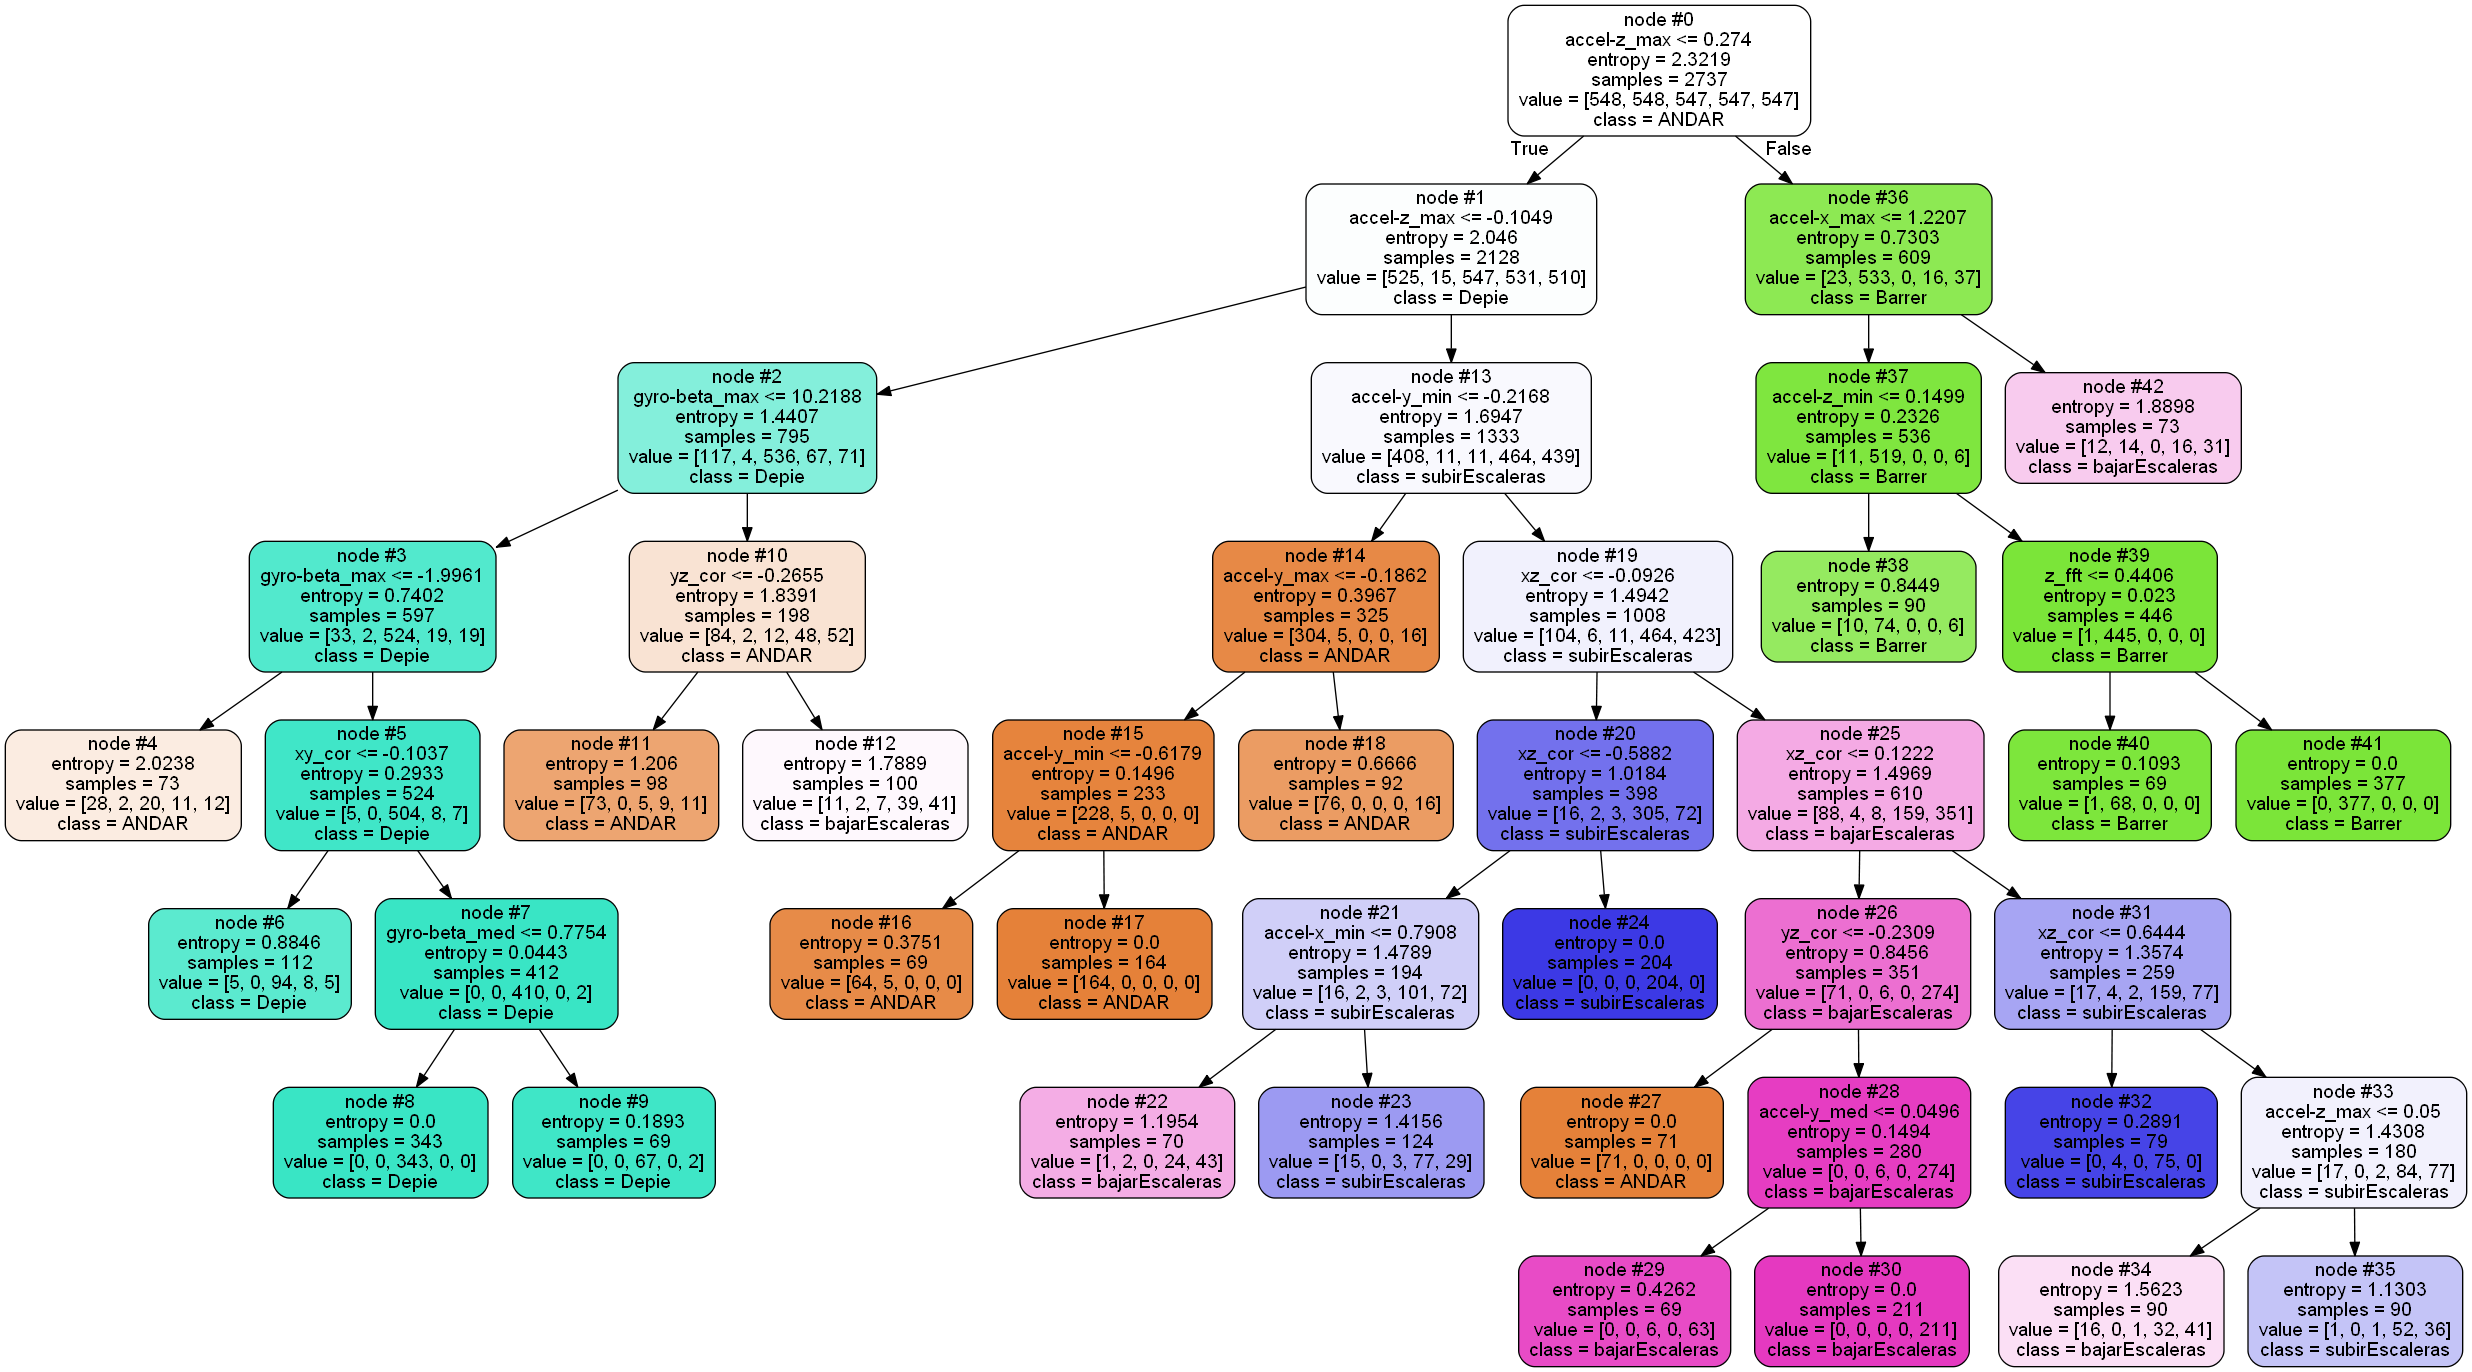

In [12]:
#Pintar aquí
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        clf, 
        out_file=None,
        
        feature_names=[ 'gyro-alpha_avg','gyro-beta_avg','gyro-gamma_avg','accel-x_avg','accel-y_avg','accel-z_avg','gyro-alpha_min','gyro-beta_min','gyro-gamma_min','accel-x_min','accel-y_min','accel-z_min','gyro-alpha_max','gyro-beta_max','gyro-gamma_max','accel-x_max','accel-y_max','accel-z_max','gyro-alpha_std','gyro-beta_std','gyro-gamma_std','accel-x_std','accel-y_std','accel-z_std','xy_cor','xz_cor','yz_cor','x_fft','y_fft','z_fft','gyro-alpha_med','gyro-beta_med','gyro-gamma_med','accel-x_med','accel-y_med','accel-z_med'],
        class_names=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],  
        filled=True,
        rounded=True,
        node_ids=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

In [29]:
clf.score(X_val ,y_val)  

0.55885588558855881

In [32]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf, X_val, y_val)
y_predict=clf.predict(X_val)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_predict)

0.55885588558855881

In [34]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y_val, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.60      0.69      0.64       182
        Barrer       1.00      0.98      0.99       181
         Depie       0.65      0.55      0.60       182
subirEscaleras       0.10      0.04      0.06       182
bajarEscaleras       0.33      0.54      0.41       182

   avg / total       0.54      0.56      0.54       909



In [35]:
import matplotlib.pyplot as plt
plot_classification_report(sampleClassificationReport)

[0.6, 0.69, 0.64]
[1.0, 0.98, 0.99]
[0.65, 0.55, 0.6]
[0.1, 0.04, 0.06]
[0.33, 0.54, 0.41]
plotMat: [[0.6, 0.69, 0.64], [1.0, 0.98, 0.99], [0.65, 0.55, 0.6], [0.1, 0.04, 0.06], [0.33, 0.54, 0.41]]
support: [182, 181, 182, 182, 182]


In [36]:
 plt.savefig('test_plot_classif_report2.png', dpi=200, format='png', bbox_inches='tight')

In [37]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_predict)

In [38]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'], normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[125   0   5  22  30]
 [  0 177   0   1   3]
 [  0   0 100  24  58]
 [ 36   0  30   7 109]
 [ 48   0  18  17  99]]
Normalized confusion matrix
[[ 0.68681319  0.          0.02747253  0.12087912  0.16483516]
 [ 0.          0.97790055  0.          0.00552486  0.01657459]
 [ 0.          0.          0.54945055  0.13186813  0.31868132]
 [ 0.1978022   0.          0.16483516  0.03846154  0.5989011 ]
 [ 0.26373626  0.          0.0989011   0.09340659  0.54395604]]


In [39]:
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape
print(model.get_support())

[False False False False False False False False False False  True False
 False  True False  True False  True False False False False False False
 False  True  True False False False False False False False False False]


# Train:Vero,Ivan,Alex  Test:Dani

In [51]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X_train= genfromtxt("X_train4.csv", delimiter=',')
y_train= genfromtxt("y_train4.csv", delimiter='')
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_val= genfromtxt("X_val4.csv", delimiter=',')
y_val= genfromtxt("y_val4.csv", delimiter='')
X_val[np.isnan(X_val)] = np.median(X_val[~np.isnan(X_val)])

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0,min_samples_split=0.009,min_samples_leaf=0.009)
clf = clf.fit(X_train, y_train)

In [53]:
clf.score(X_val ,y_val)  

0.68386388583973656

In [54]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf, X_val, y_val)
y_predict=clf.predict(X_val)

In [55]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y_val, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.74      0.74      0.74       182
        Barrer       0.85      0.95      0.90       183
         Depie       0.96      0.92      0.94       183
subirEscaleras       0.42      0.32      0.36       182
bajarEscaleras       0.42      0.50      0.46       181

   avg / total       0.68      0.68      0.68       911



In [56]:
import matplotlib.pyplot as plt
plot_classification_report(sampleClassificationReport)

[0.74, 0.74, 0.74]
[0.85, 0.95, 0.9]
[0.96, 0.92, 0.94]
[0.42, 0.32, 0.36]
[0.42, 0.5, 0.46]
plotMat: [[0.74, 0.74, 0.74], [0.85, 0.95, 0.9], [0.96, 0.92, 0.94], [0.42, 0.32, 0.36], [0.42, 0.5, 0.46]]
support: [182, 183, 183, 182, 181]


In [57]:
 plt.savefig('test_plot_classif_report4.png', dpi=200, format='png', bbox_inches='tight')

In [58]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_predict)

In [59]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Confusion matrix, without normalization
[[134   0   2  36  10]
 [  4 173   0   4   2]
 [  0   0 168  13   2]
 [  8   8   0  58 108]
 [ 36  22   5  28  90]]
Normalized confusion matrix
[[ 0.73626374  0.          0.01098901  0.1978022   0.05494505]
 [ 0.02185792  0.94535519  0.          0.02185792  0.01092896]
 [ 0.          0.          0.91803279  0.07103825  0.01092896]
 [ 0.04395604  0.04395604  0.          0.31868132  0.59340659]
 [ 0.19889503  0.12154696  0.02762431  0.15469613  0.49723757]]


# Random Forest


In [72]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X_train= genfromtxt("X_train.csv", delimiter=',')
y_train= genfromtxt("y_train.csv", delimiter='')
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_val= genfromtxt("X_val.csv", delimiter=',')
y_val= genfromtxt("y_val.csv", delimiter='')
X_val[np.isnan(X_val)] = np.median(X_val[~np.isnan(X_val)])

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8)
clf = clf.fit(X_train, y_train)


In [74]:
clf.score(X_val ,y_val)  

0.45016429353778753

In [32]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf, X_val, y_val)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_predict)

0.76787678767876788

In [34]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y_val, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.61      0.97      0.75       182
        Barrer       0.85      0.99      0.91       181
         Depie       1.00      0.99      1.00       182
subirEscaleras       0.73      0.51      0.60       182
bajarEscaleras       0.71      0.37      0.48       182

   avg / total       0.78      0.77      0.75       909



In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_predict)

In [46]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ANDAR', 'Barrer','Depie','subirEscaleras','bajarEscaleras'], normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[177   0   0   3   2]
 [  0 180   0   0   1]
 [  1   0 181   0   0]
 [ 52  12   0  93  25]
 [ 62  21   0  32  67]]
Normalized confusion matrix
[[ 0.97252747  0.          0.          0.01648352  0.01098901]
 [ 0.          0.99447514  0.          0.          0.00552486]
 [ 0.00549451  0.          0.99450549  0.          0.        ]
 [ 0.28571429  0.06593407  0.          0.51098901  0.13736264]
 [ 0.34065934  0.11538462  0.          0.17582418  0.36813187]]


In [47]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape
print(model.get_support())

[False False False  True False  True False False False False  True  True
 False False  True  True  True  True False False False False False False
 False  True  True  True False False False False False False  True  True]


# Gradient

In [84]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X_train= genfromtxt("X_train4.csv", delimiter=',')
y_train= genfromtxt("y_train4.csv", delimiter='')
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
X_val= genfromtxt("X_val4.csv", delimiter=',')
y_val= genfromtxt("y_val4.csv", delimiter='')
X_val[np.isnan(X_val)] = np.median(X_val[~np.isnan(X_val)])

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [86]:
clf.score(X_val, y_val)   

0.66849615806805707